In [1]:
import requests
from urllib.request import urlopen
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [55]:
for year in ['2018']:
    url = 'https://www.cricbuzz.com/cricket-series/ipl-{}/auction/teams'.format(year)
    print('Visiting {}'.format(url))
    response = urlopen(url)
    my_html = response.read()
    response.close()
    
    soup = BeautifulSoup(my_html, 'html.parser')
    auctions = soup.findAll('div', {'class':'cb-font-18'})
    team = []
    start_budget = []
    end_budget = []
    size = []
    auction_list = []
    for a in auctions:
        auction_list.append(a.text)
    
    def convert_denomination(a):
        if (a.split())[1] == 'Crore':
            amt = float((a.split())[0]) * 10000000
        else:
            amt = float((a.split())[0]) * 100000
        return amt
    
    for i in range(8):
        team.append(auction_list[0+4*i])
        purse = (auction_list[1+4*i]).replace('\xa0\xa0', ' ')
        start_budget.append(convert_denomination(purse))
        remaining = (auction_list[2+4*i]).replace('\xa0\xa0', ' ')
        try:
            end_budget.append(convert_denomination(remaining))
        except IndexError:
            end_budget.append(0.0)
        size.append(auction_list[3+4*i])
    
    money_spent = list(np.subtract(start_budget, end_budget))
    my_dict = {}

Visiting https://www.cricbuzz.com/cricket-series/ipl-2018/auction/teams


In [56]:
for t in range(len(team)):
    my_dict[team[t]] = money_spent[t]
my_dict

{'Bangalore Royal Challengers': 488500000.0,
 'Chennai Super Kings': 405000000.0,
 'Delhi Daredevils': 454000000.0,
 'Kings XI Punjab': 674000000.0,
 'Kolkata Knight Riders': 590000000.0,
 'Mumbai Indians': 463500000.0,
 'Rajasthan Royals': 658500000.0,
 'Sunrisers Hyderabad': 583500000.0}

In [96]:
df = pd.DataFrame(data={'Teams':['Chennai Super Kings', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab', 'Sunrisers Hyderabad'], 'Amount Spent':money_spent })

In [40]:
table = pd.read_csv("Datasets/IPL 2018 Points Table.csv")

In [42]:
for i in range(8):
    if '(' in table['Teamvte'].values[i]:
        table['Teamvte'].values[i] = (' ').join(table['Teamvte'].values[i].split()[:-1])

In [90]:
table.rename(columns={'Teamvte':'Teams'}, inplace=True)

In [93]:
table

,Teams,Pld,W,L,T,NR,Pts,NRR,Win Ratio
0,Sunrisers Hyderabad,14,9,5,0,0,18,0.284,0.642857
1,Chennai Super Kings,14,9,5,0,0,18,0.253,0.642857
2,Kolkata Knight Riders,14,8,6,0,0,16,-0.070,0.571429
3,Rajasthan Royals,14,7,7,0,0,14,-0.250,0.500000
4,Mumbai Indians,14,6,8,0,0,12,0.317,0.428571
5,Royal Challengers Bangalore,14,6,8,0,0,12,0.129,0.428571
6,Kings XI Punjab,14,6,8,0,0,12,-0.502,0.428571
7,Delhi Daredevils,14,5,9,0,0,10,-0.222,0.357143


In [92]:
table['Win Ratio'] = table['W']/table['Pld']

In [108]:
final_df = table.set_index('Teams').join(df.set_index('Teams'))
final_df['Amount Spent'] = final_df['Amount Spent']/1000000
final_df = final_df[['Win Ratio', 'Amount Spent']]
final_df

In [120]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [121]:
fig = plt.Figure()
ax = fig.add_subplot(1,1,1)

<IPython.core.display.Javascript object>


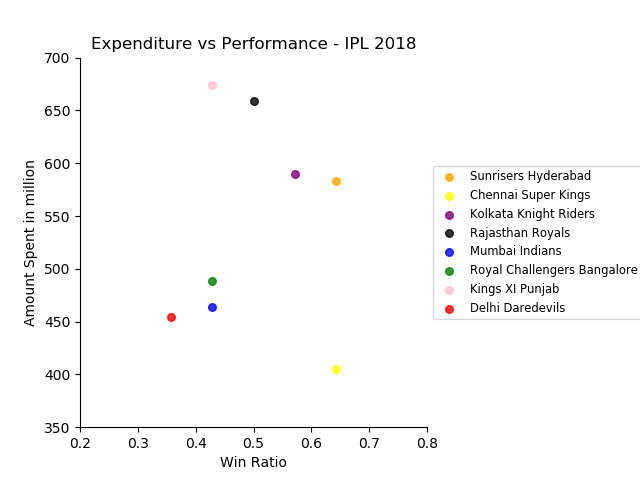

In [152]:
xval = final_df['Win Ratio'].values
yval = final_df['Amount Spent'].values
colors = ('orange','yellow','purple','black','blue','green','pink','red')
groups = list(final_df.index.values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for x,y,color,group in zip(xval,yval,colors,groups):
    ax.scatter(x, y, c=color, s=30, alpha=0.8, label=group)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.title('Expenditure vs Performance - IPL 2018')
plt.xlabel('Win Ratio')
plt.ylabel('Amount Spent in million')

plt.xticks(np.arange(0.2, 0.8, 0.1))
plt.yticks(np.arange(350, 750, 50))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')